# **Hackathon 2 Team 1 Project - Insurance Market Analysis**

# Section 3: Predictive Model

## Objective
* To predict the medical insurance cost (charges) for an individual using personal and lifestyle attributes. This model enables insurers to estimate premiums more accurately, identify key cost drivers, and improve pricing transparency.

## Input
* A cleaned and transformed dataset containing the following features:

     * age: Age of the individual

     * sex: Gender (male, female) — one-hot encoded

     * smoker: Smoking status (yes, no) — one-hot encoded

     * bmi: Body Mass Index

     * bmi_category: Body Mass Index Category (bmi_category_underweight, bmi_category_normal, bmi_category_overweight, bmi_category_obese) - one-hot encoded

     * children: Number of dependents

     * region: Residential region (northeast, northwest, southeast, southwest) — one-hot encoded

* The target variable charges is log-transformed to normalize its distribution and improve model performance.

## Output
 * A calculator for estimated insurance cost with the predictive model.

* The model is trained on log-transformed charges, predictions are exponentiated to return to the original dollar scale.

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory
We need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/denniskwok/Documents/data-analytics/Hackathon2Team1Project-Health-Insurance-Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory


In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/denniskwok/Documents/data-analytics/Hackathon2Team1Project-Health-Insurance-Analysis'

---

# Predictive Model: Estimate Medical Costs Based on Demographic Data

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Load the cleaned and transformed dataset

In [5]:
# Load the dataset (already clean)

df = pd.read_csv("dataset/processed/Insurance_cleaned_orig.csv")
df_encoded = pd.read_csv("dataset/processed/Insurance_cleaned_transformed.csv")
df.head()
df_encoded.head()

,ID,age,bmi,children,charges,sex_female,smoker_yes,region_southwest,region_southeast,region_northwest,bmi_category_overweight,bmi_category_obese,bmi_category_normal,log_charges
0,1,19,27.900,0,16884.92400,1,1,1,0,0,1,0,0,9.734176
1,2,18,33.770,1,1725.55230,0,0,0,1,0,0,1,0,7.453302
2,3,28,33.000,3,4449.46200,0,0,0,1,0,0,1,0,8.400538
3,4,33,22.705,0,21984.47061,0,0,0,0,1,0,0,1,9.998092
4,5,32,28.880,0,3866.85520,0,0,0,0,1,1,0,0,8.260197


Split features and target for train-test

In [6]:
# Split into features and target
X = df_encoded.drop(["charges", "log_charges", "ID"], axis=1)
y = df_encoded["log_charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train baseline Model (Linear Regression)

In [7]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R²:", r2_score(y_test, y_pred_lin))

Linear Regression Performance:
MAE: 0.2759659203138318
RMSE: 0.42114481143823435
R²: 0.802741707309323


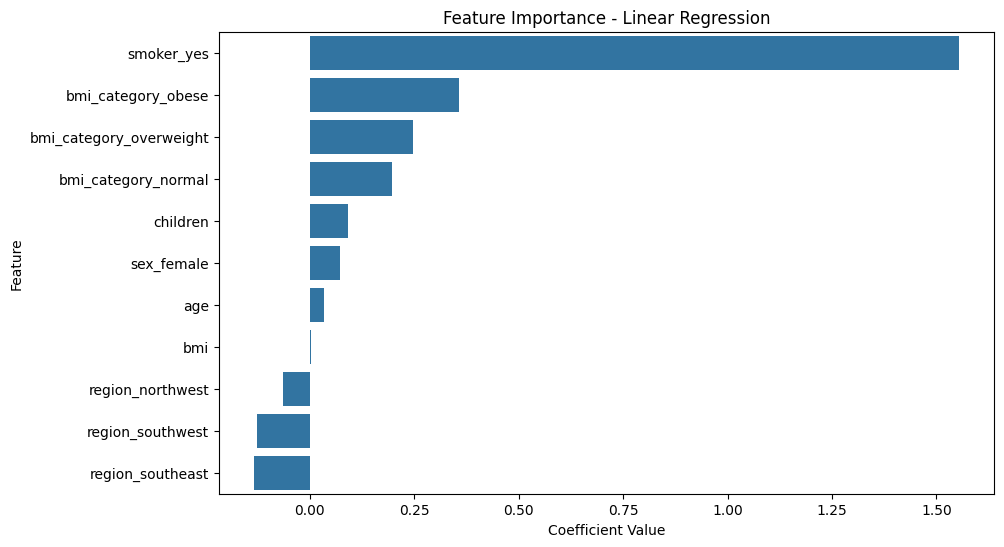

In [8]:
# create feature importance function for linear regression
def plot_feature_importance(model, feature_names):
    importance = model.coef_
    feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance.values, y=feature_importance.index)
    plt.title("Feature Importance - Linear Regression")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.show()  
plot_feature_importance(lin_model, X.columns)
    

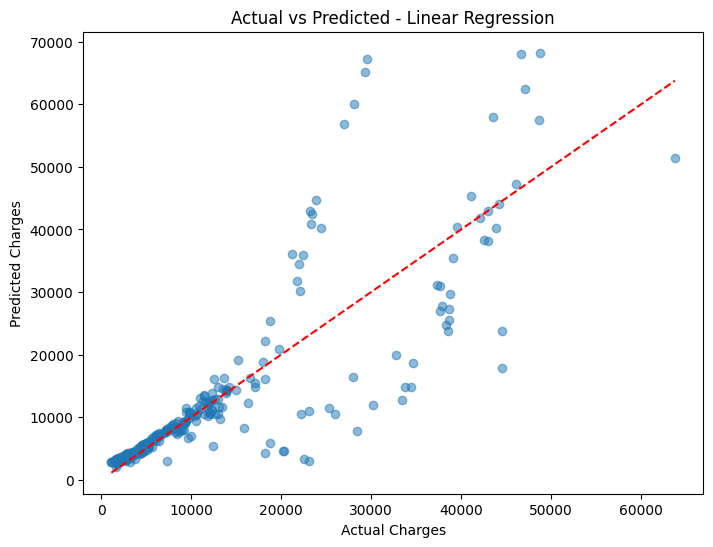

In [9]:
# plot actual vs predicted values with exponential charges for linear regression

# convert log charges back to original scale for better interpretability
y_test_exp = np.exp(y_test)
y_pred_lin_exp = np.exp(y_pred_lin) # convert log predictions back to original scale    

plt.figure(figsize=(8, 6))
plt.scatter(y_test_exp, y_pred_lin_exp, alpha=0.5)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted - Linear Regression")

plt.show()




Train Advanced Model (Random forest)

In [10]:
X_train.head()


,age,bmi,children,sex_female,smoker_yes,region_southwest,region_southeast,region_northwest,bmi_category_overweight,bmi_category_obese,bmi_category_normal
560,46,19.95,2,1,0,0,0,1,0,0,1
1285,47,24.32,0,1,0,0,0,0,0,0,1
1142,52,24.86,0,1,0,0,1,0,0,0,1
969,39,34.32,5,1,0,0,1,0,0,1,0
486,54,21.47,3,1,0,0,0,1,0,0,1


In [11]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 0.19531971973451387
RMSE: 0.3710885993301655
R²: 0.8468462676428753


* Random Forest Performance Interpretation:
    * MAE: Average error in dollars — lower is better.
    * RMSE: Penalizes large errors — useful for understanding volatility.
    * R² Score: Proportion of variance explained — closer to 1 means better fit.

Feature Importance (Random Forest)

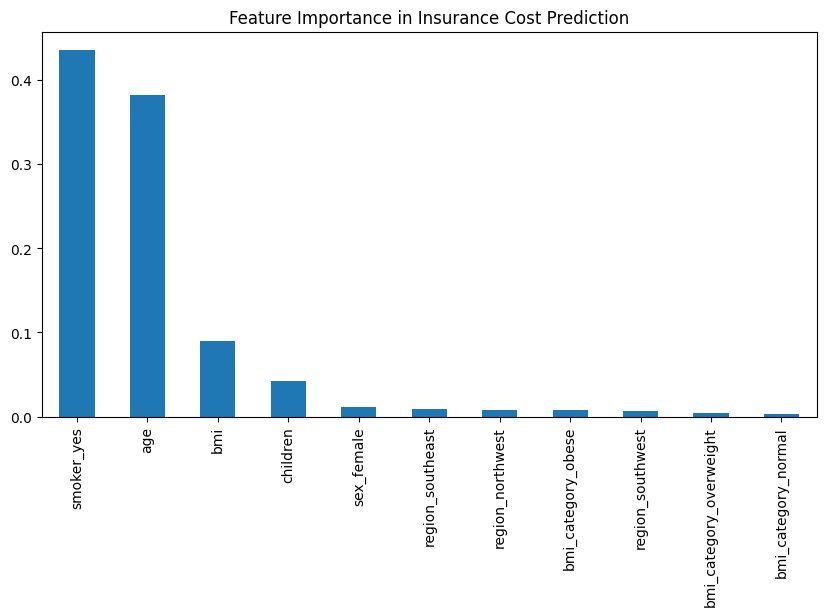

In [12]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Feature Importance in Insurance Cost Prediction")
plt.show()


Chart of Predicted vs Actual visualization

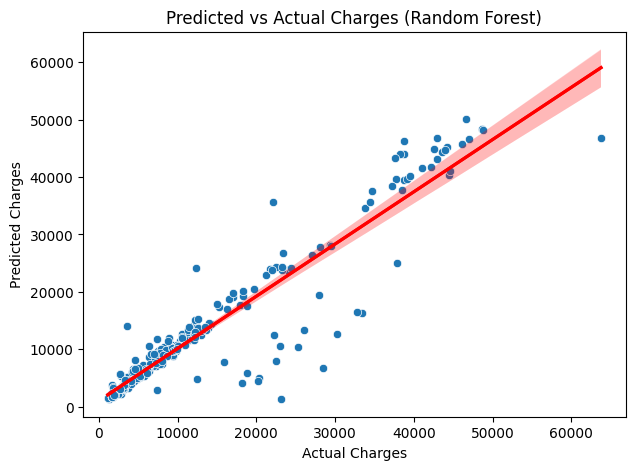

In [13]:
# Plot predicted vs actual values for Random Forest with exponential charges
y_test = np.exp(y_test)  # convert log charges back to original scale
y_pred_rf = np.exp(y_pred_rf)  # convert log predictions back to original scale  

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred_rf)
sns.regplot(x=y_test, y=y_pred_rf, scatter=False, color='red', line_kws={'label': 'Trend Line'})
plt.title("Predicted vs Actual Charges (Random Forest)")
sns.regplot(x=y_test, y=y_pred_rf, scatter=False, color='r')   
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

Decision Tree Map from Random Forest 

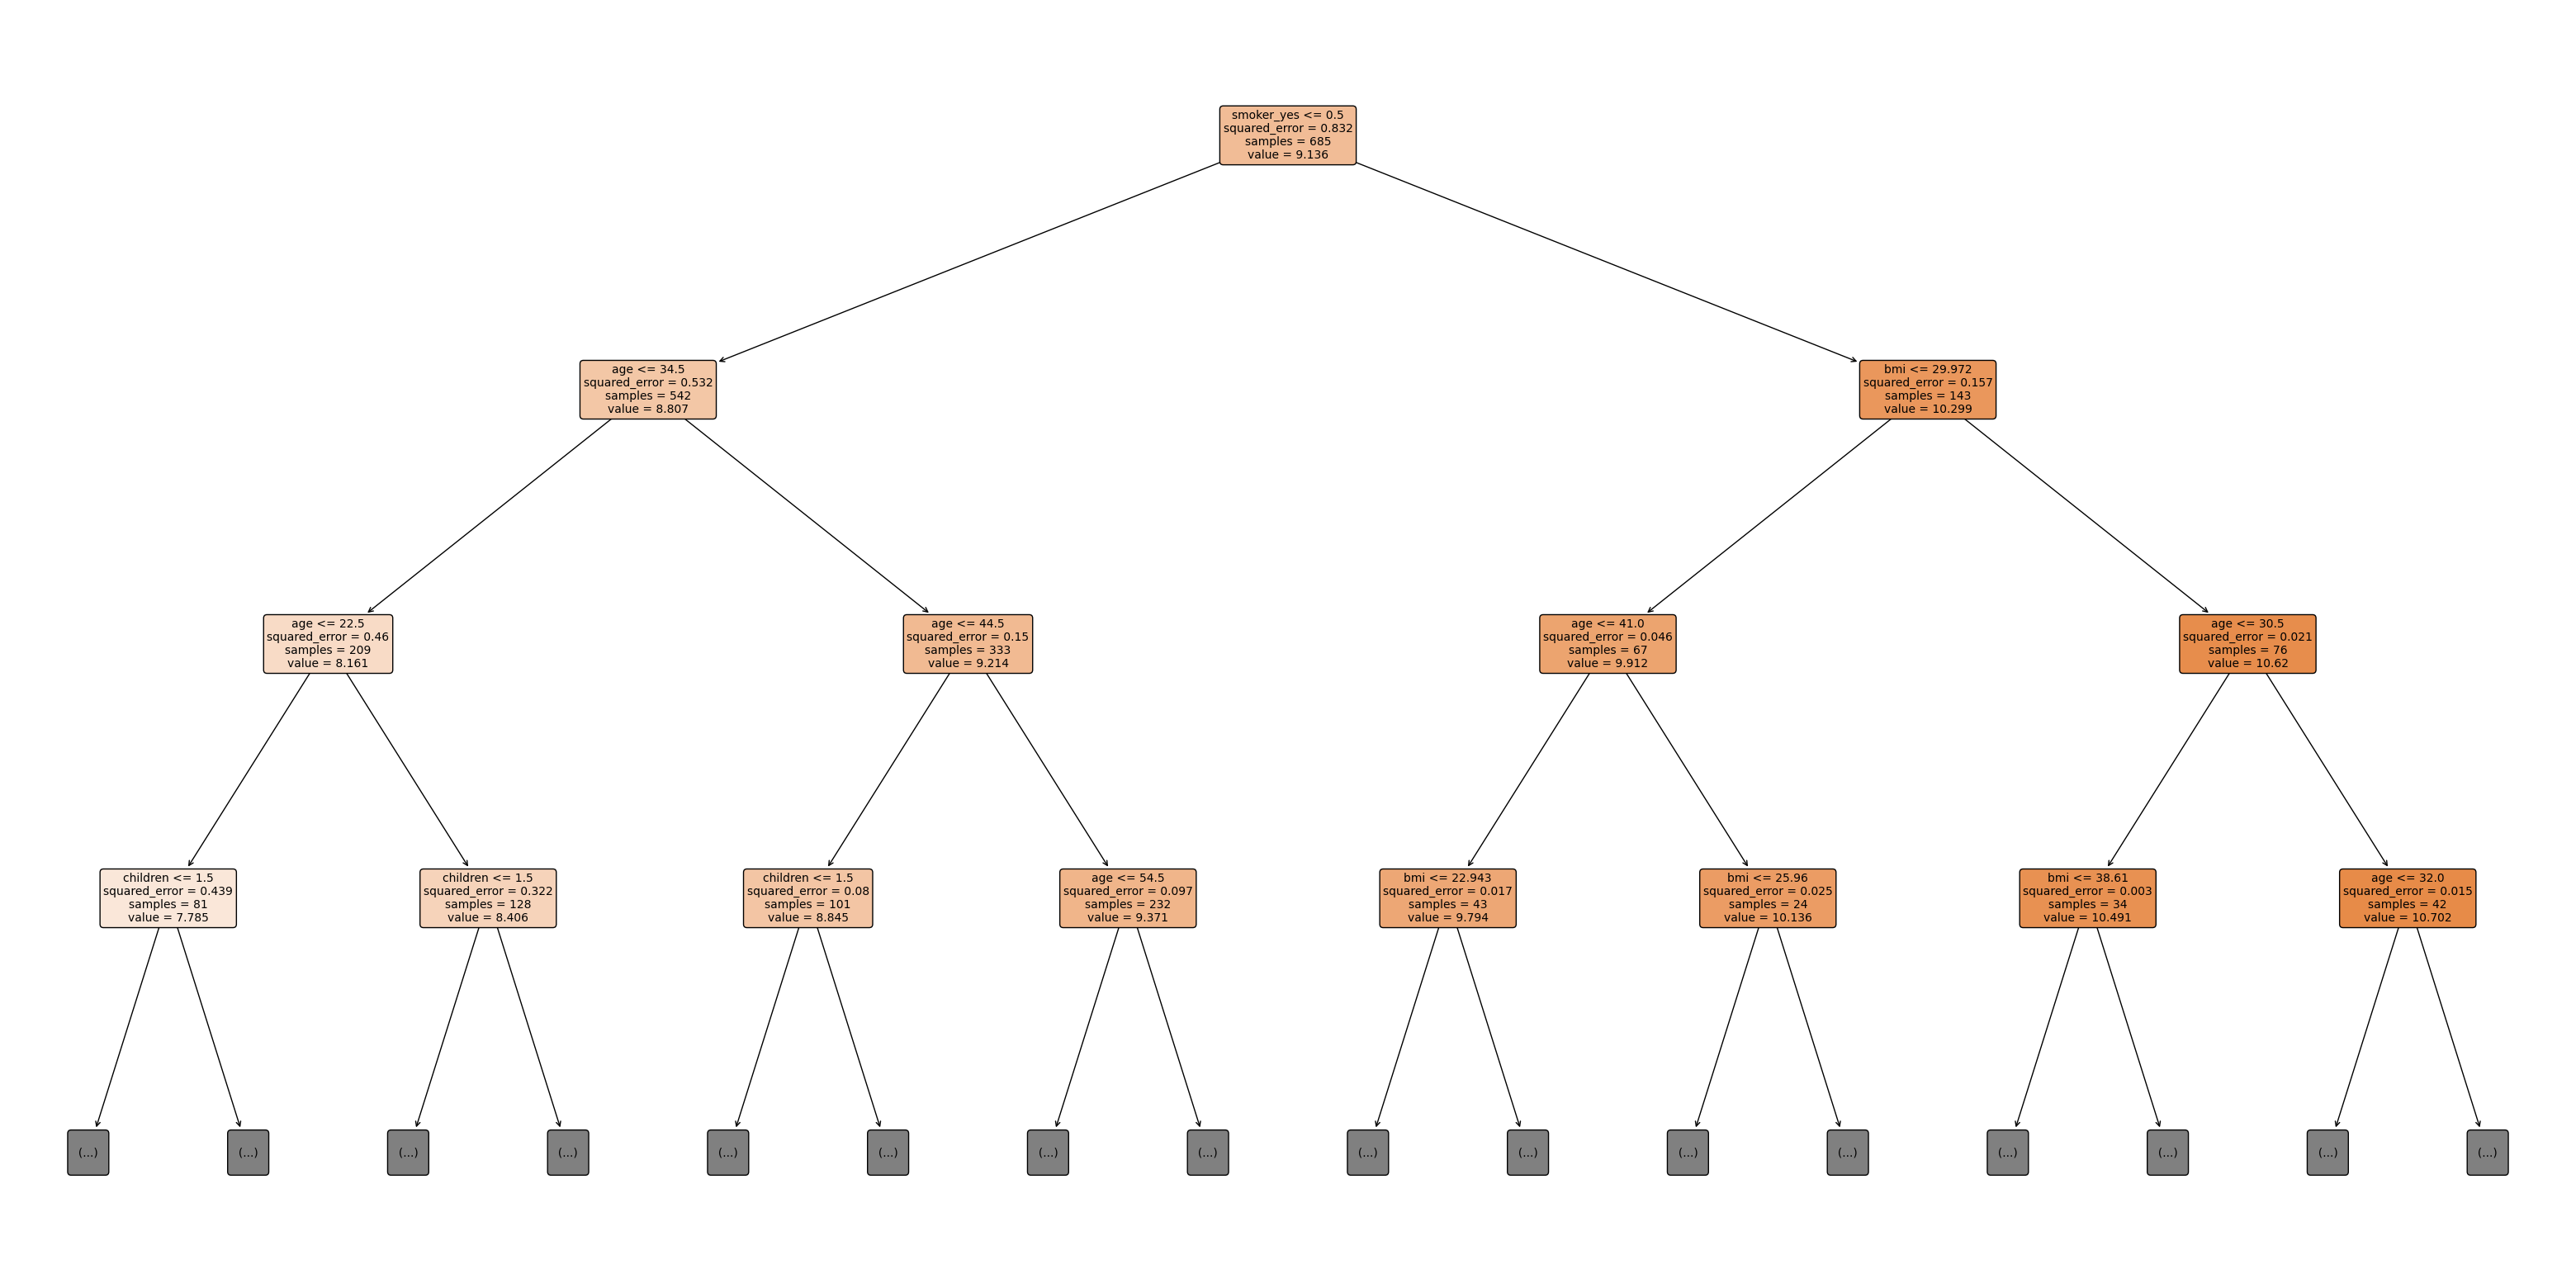

In [14]:
# show a decision tree from the random forest

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pick one tree from the forest
estimator = rf_model.estimators_[0]

plt.figure(figsize=(40,20))
plot_tree(estimator, 
          feature_names=X.columns, 
          filled=True, 
          max_depth=3,
          class_names=['No', 'Yes'],  # Add this line for Yes/No labels
          rounded=True,  # Optional: makes boxes rounded
          fontsize=10)   # Optional: adjust font size for readability
plt.savefig('tree.png', dpi=300, bbox_inches='tight')

plt.show()

---

# Insurance Cost Estimation Calculator

Predictive Model Cost Calculator Function

In [15]:
def predict_insurance_cost_v3(age, sex, bmi_category, children, smoker, region, model, feature_names):
    """
    Predict medical insurance cost using transformed features:
    - age (numeric)
    - sex (male/female)
    - bmi_category (normal/overweight/obese)
    - children (numeric)
    - smoker (yes/no -> smoker_yes dummy)
    - region (one-hot)
    
    Parameters:
        bmi_category: str ("normal", "overweight", "obese")
    """
    
    # Start with zero row with the same feature columns
    row = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names, dtype=float)

    # numeric features
    if 'age' in row.columns:       row.at[0, 'age'] = age
    if 'children' in row.columns:  row.at[0, 'children'] = children

    # sex
    if 'sex_male' in row.columns:
        row.at[0, 'sex_male'] = 1.0 if sex.lower() == 'male' else 0.0
    if 'sex_female' in row.columns:
        row.at[0, 'sex_female'] = 1.0 if sex.lower() == 'female' else 0.0

    # BMI categories (set exactly one to 1.0)
    if bmi_category.lower() == 'normal' and 'bmi_category_normal' in row.columns:
        row.at[0, 'bmi_category_normal'] = 1.0
    if bmi_category.lower() == 'overweight' and 'bmi_category_overweight' in row.columns:
        row.at[0, 'bmi_category_overweight'] = 1.0
    if bmi_category.lower() == 'obese' and 'bmi_category_obese' in row.columns:
        row.at[0, 'bmi_category_obese'] = 1.0

    # smoker (yes/no → smoker_yes dummy)
    if 'smoker_yes' in row.columns:
        row.at[0, 'smoker_yes'] = 1.0 if smoker.lower() == 'yes' else 0.0

    # region one-hot (e.g., region_southeast, region_northwest)
    r_target = f"region_{region.lower()}"
    for c in [c for c in row.columns if c.startswith('region_')]:
        row.at[0, c] = 1.0 if c == r_target else 0.0

    # predict on log scale then invert
    pred_log = model.predict(row)[0]
    return round(float(np.exp(pred_log)), 2)

# Get BMI category based on BMI value
def get_bmi_category(bmi):
    if bmi < 18.5:
        return "underweight"
    elif bmi < 25:
        return "normal"
    elif bmi < 30:
        return "overweight"
    else:
        return "obese"


Predictive Model Cost Calculator Pilot Run

In [16]:
# Target individual details
age = 35
sex = "male"
bmi = 28.0
children = 2
smoker = "no"
region = "southeast"

# Pass bmi into the function to get the category
bmi_category = get_bmi_category(bmi)

# Predict insurance cost
predicted_cost = predict_insurance_cost_v3(
    age=age,
    sex=sex,
    bmi_category=bmi_category,
    children=children,
    smoker=smoker,
    region=region,
    model=rf_model,
    feature_names=X.columns
)

print(f"Predicted Insurance Cost: ${predicted_cost}")
print(f"Details — Age: {age}, BMI: {bmi}, BMI Category: {bmi_category}, Sex: {sex}, Children: {children}, Smoker: {smoker}, Region: {region}")


Predicted Insurance Cost: $7847.06
Details — Age: 35, BMI: 28.0, BMI Category: overweight, Sex: male, Children: 2, Smoker: no, Region: southeast


Predictive Model Cost Calculator (Interactive Input)

In [18]:
# Interactive cost calculator
age = int(input("Enter an integer for age: "))
sex = str(input("Enter 'male' or 'female' for sex: "))
bmi = float(input("Enter a decimal number for bmi: "))  
children = int(input("Enter an integer for number of children: "))
smoker = str(input("Enter 'yes' or 'no' for smoker status: "))
region = str(input("Enter 'southwest' or 'southeast' or 'northwest' or 'northeast' for region: "))

# Pass bmi into the function to get the category
bmi_category = get_bmi_category(bmi)

# Predict insurance cost
predicted_cost = predict_insurance_cost_v3(
    age=age,
    sex=sex,
    bmi_category=bmi_category,
    children=children,
    smoker=smoker,
    region=region,
    model=rf_model,
    feature_names=X.columns
)

print(f"Predicted Insurance Cost: ${predicted_cost}")
print(f"Details — Age: {age}, BMI: {bmi}, BMI Category: {bmi_category}, Sex: {sex}, Children: {children}, Smoker: {smoker}, Region: {region}")


Predicted Insurance Cost: $8008.65
Details — Age: 23, BMI: 40.0, BMI Category: obese, Sex: female, Children: 0, Smoker: no, Region: northwest


---

## Conclusion

The Random Forest model effectively predicts medical insurance charges using demographic and lifestyle features. Feature importance analysis highlights key drivers such as smoking status, age, and BMI. The model demonstrates reasonable accuracy, as shown by performance metrics and the alignment of predicted vs actual charges. This predictive tool can help insurers estimate costs more transparently and support data-driven decision making for premium calculations. Future improvements could include additional feature engineering, hyperparameter tuning, and testing other advanced models to further enhance prediction accuracy.